# Импорт данных

In [8]:
import pandas as pd

df=pd.read_excel('инно_комп.xlsx')
df['module'] = df['module'].astype(str).str.lower()
df['syllabus'] = df['syllabus'].astype(str).str.lower()

df.tail()

,discipline,module,syllabus,competence
77,Облачные технологии,"базы данных, безопасность и сети доставки конт...","сервисы баз данных, сервисы безопасности и сер...",NaN
78,Нейронные сети и глубокое обучение,введение в нейронные сети,классическое компьютерное зрение; современное ...,нейронные сети; глубокое обучение; компьютерно...
79,Нейронные сети и глубокое обучение,обучение нейронных сетей,градиентный спуск; обучение нейронных сетей; п...,NaN
80,Нейронные сети и глубокое обучение,сверточные нейронные сети,компьютерное зрение; классификаци; семантическ...,NaN
81,Нейронные сети и глубокое обучение,представления для текстов,nag of words; word2vec; skip gram model; рекур...,NaN


In [2]:
!pip install transformers torch sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

#EDA

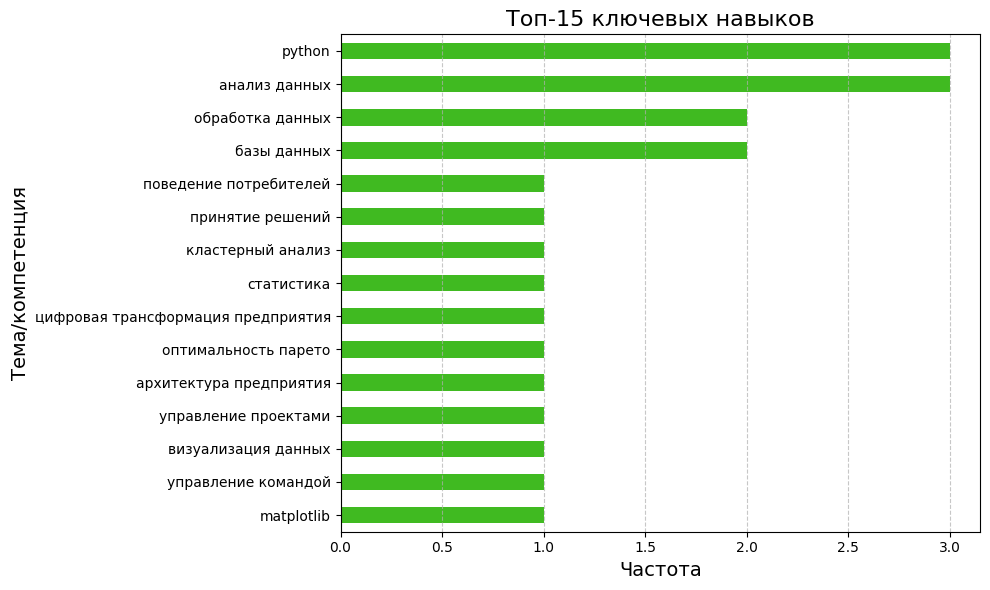

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# Разбивка и подсчет тем из аннотаций
annotation_series = df['competence'].dropna().str.lower().str.split(';').explode().str.strip()
annotation_counts = pd.Series(Counter(annotation_series)).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
annotation_counts.plot(kind='barh', color='#40BA21')
plt.title('Топ-15 ключевых навыков', fontsize=16)
plt.xlabel('Частота', fontsize=14)
plt.ylabel('Тема/компетенция', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


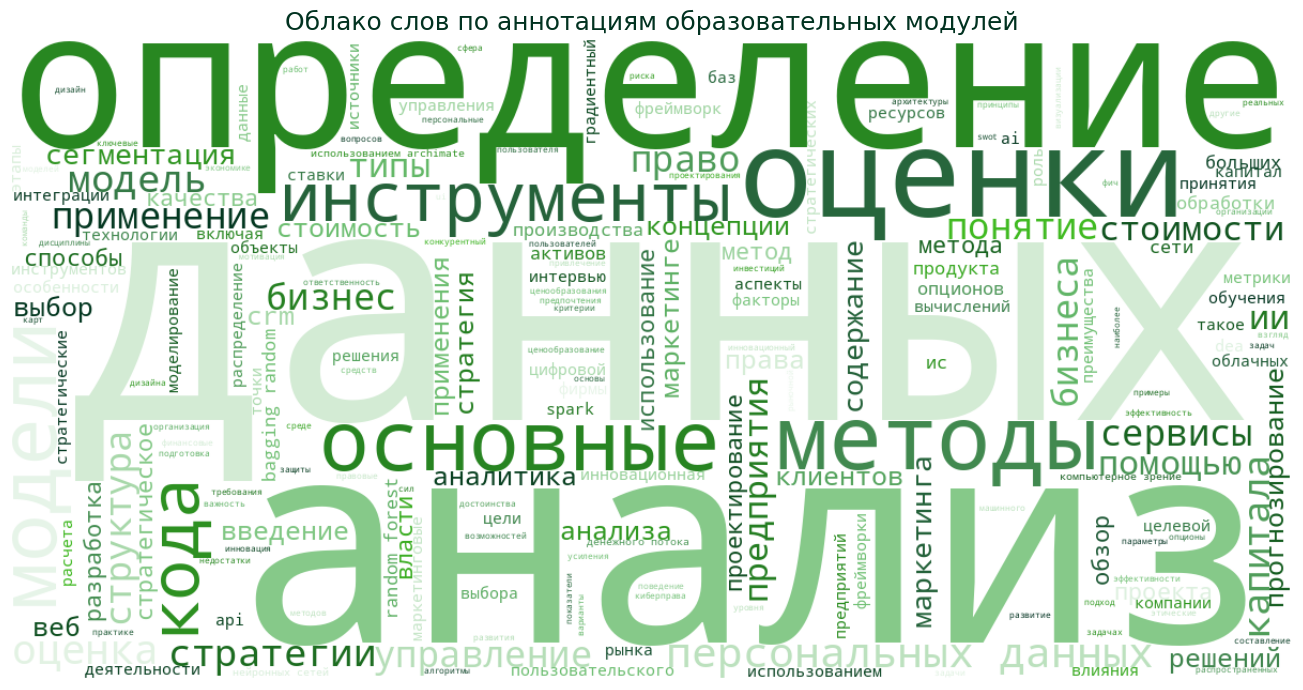

In [4]:
green_palette = [
    '#E8F5E9',  # светлый
    '#66BB6A',  # средний
    '#013220',  # темный
    '#40BA21'   # основной акцентный
]

import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from nltk.corpus import stopwords
import nltk

# Скачиваем стоп-слова для русского языка
nltk.download('stopwords')

# Получаем список русских стоп-слов
russian_stopwords = stopwords.words('russian')

# Добавляем дополнительные слова для исключения
custom_stopwords = ['и', 'в', 'на', 'с', 'по', 'для', 'из', 'от', 'к', 'у', 'о', 'за', 'до']
all_stopwords = set(russian_stopwords + custom_stopwords)

# Обработка текста с удалением стоп-слов
annotation_series = (
    df['syllabus']
    .dropna()
    .str.lower()
    .str.split(';')
    .explode()
    .str.strip()
    .apply(lambda x: ' '.join([word for word in x.split() if word not in all_stopwords]))
)

# Создаем кастомную цветовую карту
green_cmap = LinearSegmentedColormap.from_list('green_cmap', green_palette)

# Генерация облака слов
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap=green_cmap,  # Используем нашу зеленую палитру
    stopwords=all_stopwords,
    max_words=200,
    contour_width=1,
    contour_color='#013220',  # Темно-зеленый контур
    prefer_horizontal=0.9,
    relative_scaling=0.5
).generate(' '.join(annotation_series))

# Визуализация
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов по аннотациям образовательных модулей',
          fontsize=18,
          fontfamily='Times New Roman',
          color='#013220')  # Темно-зеленый цвет заголовка
plt.tight_layout()
plt.savefig('wordcloud_green.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np

# Загрузка модели
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Функция для получения строки с эмбеддингами
def get_embeddings(annotation):
    if pd.isna(annotation):
        return ""
    competencies = [comp.strip() for comp in annotation.split(";") if comp.strip()]
    embeddings = model.encode(competencies)
    # Преобразуем каждый эмбеддинг в строку и соединяем через |
    return "|".join([",".join(map(str, emb)) for emb in embeddings])

# Применяем к колонке
df["syllabus_emb"] = df["syllabus"].apply(get_embeddings)
df["competence_emb"] = df["competence"].apply(get_embeddings)

df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,discipline,module,syllabus,competence,syllabus_emb,competence_emb
0,Анализ решений,модели выбора с учетом одного и нескольких кри...,"процесс принятия решений, его участники и этап...",оптимальность Парето; принятие решений; сетево...,"0.02729069,0.07750379,-0.01511706,-0.10210815,...","-0.040736824,-0.023933763,-0.019101454,-0.0031..."
1,Анализ решений,сопоставления,предпочтения участников; устойчивые сопоставле...,NaN,"0.012326942,0.0725301,-0.019411998,-0.00586827...",
2,Анализ решений,справедливое разделение,критерии для справедливого разделения; процеду...,NaN,"-0.051066983,0.07139643,-0.017297843,-0.003878...",
3,Анализ решений,сетевой анализ,основные концепции сетей; классические и новые...,NaN,"-0.01568009,-0.11543521,-0.012716292,0.0085482...",
4,Анализ решений,анализ данных в бизнесе,анализ данных; кластерный анализ; анализ шабло...,NaN,"-0.19579561,0.24234797,-0.011640785,0.05361570...",
...,...,...,...,...,...,...
77,Облачные технологии,"базы данных, безопасность и сети доставки конт...","сервисы баз данных, сервисы безопасности и сер...",NaN,"-0.020878738,0.14849474,-0.008903409,0.0113717...",
78,Нейронные сети и глубокое обучение,введение в нейронные сети,классическое компьютерное зрение; современное ...,нейронные сети; глубокое обучение; компьютерно...,"-0.11549792,0.07047862,-0.012141667,0.03100092...","-0.048240263,0.05950895,-0.012514188,0.0224128..."
79,Нейронные сети и глубокое обучение,обучение нейронных сетей,градиентный спуск; обучение нейронных сетей; п...,NaN,"-0.073159434,0.0041141077,-0.01938444,0.068238...",
80,Нейронные сети и глубокое обучение,сверточные нейронные сети,компьютерное зрение; классификаци; семантическ...,NaN,"-0.11541737,-0.026131056,-0.014523808,0.033208...",


In [14]:
df.to_csv('ep_inno_emb.csv')